1. What is hypothesis testing in statistics?
- Hypothesis testing is a method to test validity of a claim about a population parameter based on sample data.



2. What is the null hypothesis, and how does it differ from the alternative hypothesis?
- Null hypothesis assumes there is no relationship between the two groups or variables.
- Alternative hypothesis contradicts the null hypothesis by assuming there is a relationship between the two variables.


3. Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.
- Significance level (alpha) is predetermined threshold that defines the probability for rejecting the null hypothesis when actually it is true.

4. What are Type I and Type II errors? Give examples of each.
- Type I error >> False positive : Rejection of null hypothesis when it is actually true. ex: An innocent person is convicted.
- Type II error >> False negative : Failure to reject null hypothesis that is actually false. ex: A guilty person may not be convicted.

5. What is the difference between a Z-test and a T-test? Explain when to use each.
- Z-test >> used when population standard deviation is known and sample size is greater than 30. Based on normal distribution.
- T-test >> used when sample size is less than 30 or standard deviation is unknown. Based on standard normal distribution.

6. Write a Python program to generate a binomial distribution with n=10 and p=0.5, then plot its histogram.

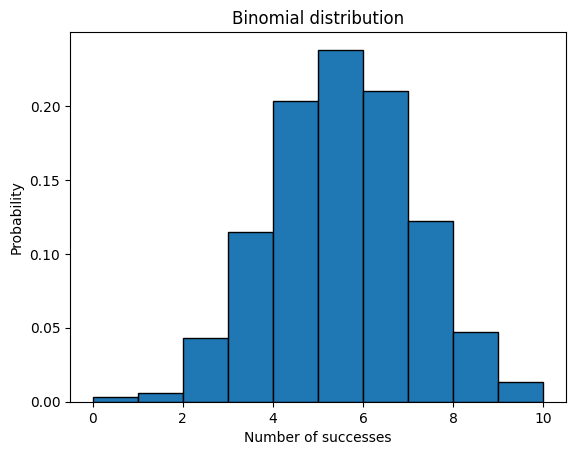

In [5]:
import numpy as np
import matplotlib.pyplot as plt
n = 10 #no of trials
p = 0.5 #probability of success
s = 1000 #sample size
data = np.random.binomial(n, p, s)
plt.hist(data, bins=np.arange(0,n+1,1), density=True, edgecolor='black')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.title('Binomial distribution')
plt.show()

7. Implement hypothesis testing using Z-statistics for a sample dataset in Python. Show the Python code and interpret the results.
sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6, 50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,50.3, 50.4, 50.0, 49.7, 50.5, 49.9]


In [7]:
from scipy import stats
sample_data = np.array([49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2,
                        49.6, 50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7,
                        50.2, 49.5, 50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3,
                        49.8, 50.2, 50.9, 50.3, 50.4, 50.0, 49.7, 50.5, 49.9])
#assumtion of parameters
population_mean = 50
population_std = 0.5
alpha = 0.5
sample_mean = np.mean(sample_data)
len_data = len(sample_data)
z_statistic = (sample_mean - population_mean) / (population_std / np.sqrt(len_data))
p_value = 1 - stats.norm.cdf(z_statistic)

if p_value < alpha:
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

print(f"Sample Mean: {sample_mean:.2f}")
print(f"Z-statistic: {z_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

Reject null hypothesis
Sample Mean: 50.09
Z-statistic: 1.07
P-value: 0.143


8. Write a Python script to simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data using Matplotlib.


Sample Mean: 50.19
95% Confidence Interval: (49.59, 50.80)


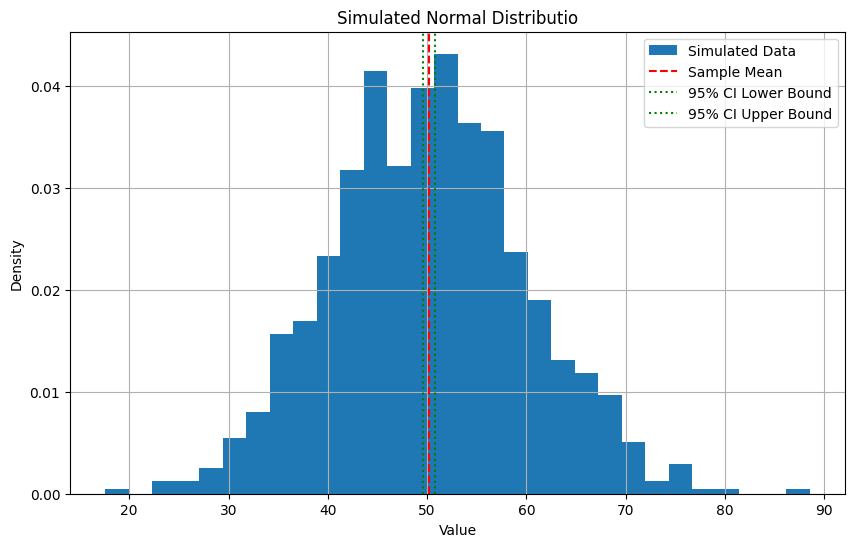

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

#Simulate data from a normal distribution
mu_true = 50  #population mean
sigma_true = 10  #population standard
sample_size = 1000  #no of data points

np.random.seed(42)  #reproducibility
data = np.random.normal(loc=mu_true, scale=sigma_true, size=sample_size)

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
standard_error = sample_std / np.sqrt(sample_size)

confidence_level = 0.95
degrees_freedom = sample_size - 1

t_critical = t.ppf((1 + confidence_level) / 2, df=degrees_freedom)

margin_of_error = t_critical * standard_error
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"Sample Mean: {sample_mean:.2f}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, label='Simulated Data')
plt.axvline(sample_mean, color='red', linestyle='dashed', label='Sample Mean')
plt.axvline(lower_bound, color='green', linestyle='dotted', label='95% CI Lower Bound')
plt.axvline(upper_bound, color='green', linestyle='dotted', label='95% CI Upper Bound')

plt.title('Simulated Normal Distributio')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

9. Write a Python function to calculate the Z-scores from a dataset and visualize the standardized data using a histogram. Explain what the Z-scores represent in terms of standard deviations from the mean.


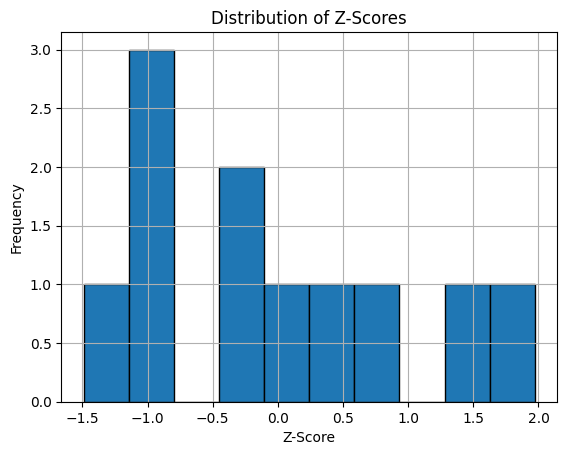

[-1.48889173 -1.027545   -0.79687163 -0.79687163 -0.3355249  -0.10485153
  0.12582184  0.3564952   0.81784194  1.27918867  1.97120877]
Std deviation is below mean


In [23]:
from scipy.stats import zscore
data = [10, 12, 13, 13, 15, 16, 17, 18, 20, 22, 25]
def calulate_z_score(data):
  z_scores = zscore(data)
  plt.hist(z_scores, bins=10, edgecolor='black')
  plt.xlabel('Z-Score')
  plt.ylabel('Frequency')
  plt.title('Distribution of Z-Scores')
  plt.grid(True)
  plt.show()
  return z_scores

z_score = calulate_z_score(data)
print(z_score)

def explain_z_scores(z_score):
  if z_score > 0:
    print('Std deviation is above mean')
  elif z_score < 0:
    print('Std deviation is below mean')
  else:
    print('Represents the mean')

explain_z_scores(z_score=z_scores[0])